<a href="https://colab.research.google.com/github/Ola2808-Boro/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from math import gamma

In [6]:
#read csv
df = pd.read_csv('diabetes.csv')


In [7]:
#find NaN in data
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#replace 0 to NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0,np.nan)

In [11]:
#find NaN in data
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
df_describe=df.describe()


In [14]:
#find NaN and replace mean value
df_describe
columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']

for column in columns:
  df[column].fillna(value=df_describe[column][1], inplace=True)


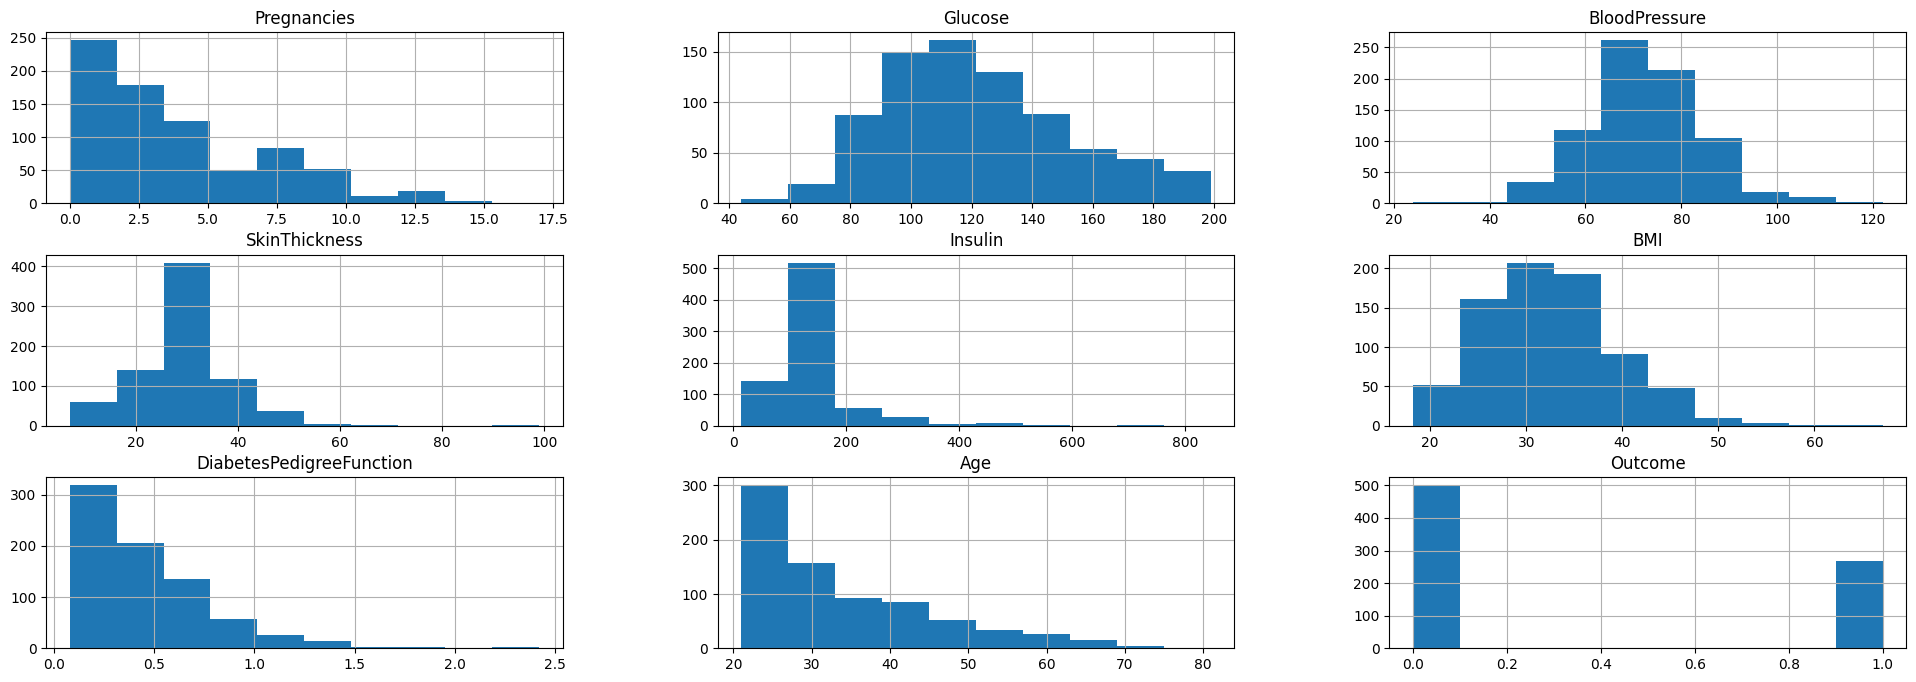

In [15]:
#dispaly histograms
hist=df.hist(figsize=(24,8))

In [16]:
#calculate correlactions
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [17]:
# normalize data
normalized_arr = preprocessing.normalize(df.drop('Outcome',axis=1))
print(normalized_arr)
print(normalized_arr.shape)

df_normalize=pd.DataFrame(data=normalized_arr, columns=df.columns[:8])
df_normalize.head(10)

[[0.02531542 0.62444699 0.30378502 ... 0.14176634 0.00264546 0.21096182]
 [0.00511063 0.43440382 0.33730179 ... 0.13594284 0.00179383 0.15842963]
 [0.03155837 0.72189763 0.25246693 ... 0.09191374 0.0026509  0.12623347]
 ...
 [0.02691539 0.65135243 0.38758161 ... 0.14103664 0.00131885 0.16149234]
 [0.0045817  0.57729389 0.27490185 ... 0.1379091  0.00159901 0.21533978]
 [0.00499006 0.46407562 0.34930423 ... 0.15169784 0.00157187 0.11477139]]
(768, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.025315,0.624447,0.303785,0.147673,0.656295,0.141766,0.002645,0.210962
1,0.005111,0.434404,0.337302,0.148208,0.794950,0.135943,0.001794,0.158430
2,0.031558,0.721898,0.252467,0.115004,0.613606,0.091914,0.002651,0.126233
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655
5,0.023426,0.543473,0.346698,0.136587,0.728760,0.119939,0.000942,0.140553
6,0.021765,0.565900,0.362757,0.232164,0.638452,0.224909,0.001799,0.188633
7,0.046778,0.537949,0.338698,0.136374,0.727626,0.165127,0.000627,0.135657
8,0.003408,0.335723,0.119292,0.076688,0.925369,0.051977,0.000269,0.090321
9,0.034452,0.538315,0.413426,0.125550,0.669871,0.139779,0.000999,0.232552


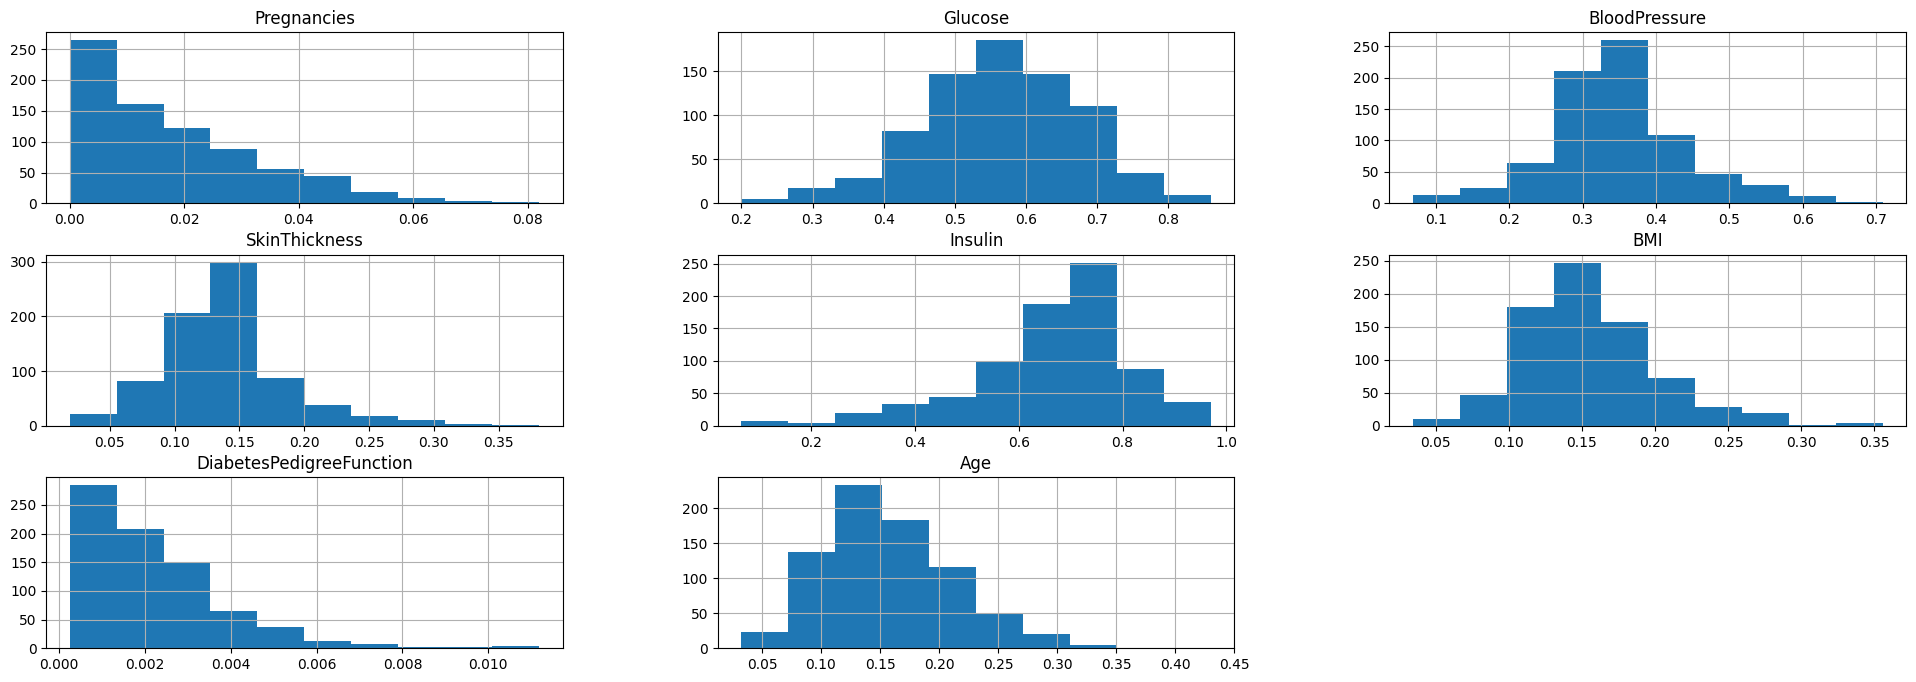

In [18]:
#display histograms
hist=df_normalize.hist(figsize=(24,8))

In [19]:
#data standardization
scaler = StandardScaler()
standard_data=scaler.fit_transform(df.drop('Outcome',axis=1))
standard_df=pd.DataFrame(standard_data,columns=df.drop('Outcome',axis=1).columns)
standard_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732


In [22]:
#split data
X = standard_df
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=100)

Algorithm 1 - SVM

Parameters: SVC(kernel=poly,degree=3,gamma=scale)
Accuracy Score = 0.7337662337662337
[[95  6]
 [35 18]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       101
           1       0.75      0.34      0.47        53

    accuracy                           0.73       154
   macro avg       0.74      0.64      0.65       154
weighted avg       0.74      0.73      0.70       154



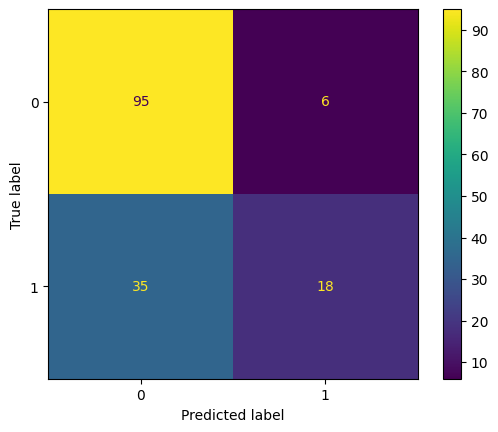

In [24]:
kernel='poly'
degree=3
gamma='scale'
svc_model=SVC(kernel=kernel,degree=degree,gamma=gamma)
svc_model.fit(X_train,y_train)
svc_pred = svc_model.predict(X_test)
print('Parameters: SVC(kernel={},degree={},gamma={})'.format(kernel,degree,gamma))
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))
cm = confusion_matrix(y_test, svc_pred,labels=svc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_model.classes_)
disp.plot()
plt.show()

Algorithm 2 - Decision Tree

Parameters: DecisionTreeClassifier(max_depth=10,criterion=log_loss)
Accuracy Score = 0.6558441558441559


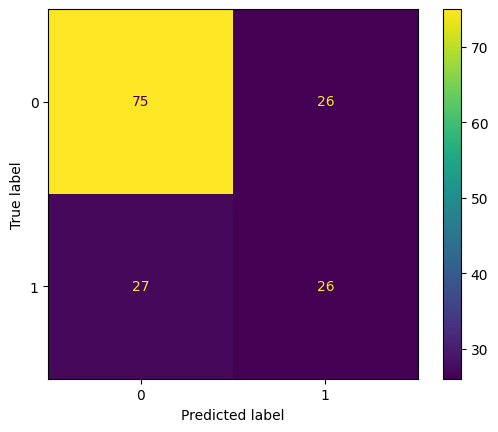

In [25]:
criterion='log_loss'
max_depth=10
dtree = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print('Parameters: DecisionTreeClassifier(max_depth={},criterion={})'.format(max_depth,criterion))
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))
cm = confusion_matrix(y_test, predictions,labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()
plt.show()

Algorithm 3 - Random Forest

Parameters: RandomForestClassifier(n_estimators=200)
Accuracy_Score = 1.0
[[83 18]
 [27 26]]


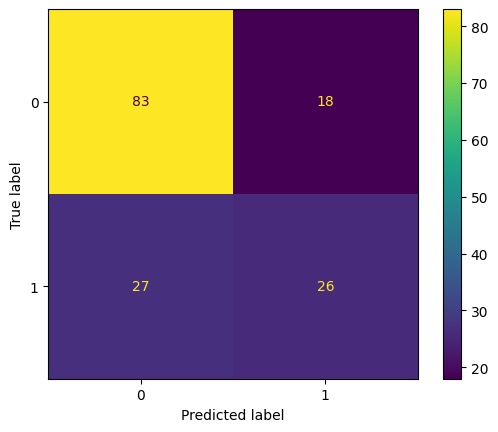

Accuracy_Score = 0.7077922077922078


In [26]:
n_estimators=200
rfc = RandomForestClassifier(n_estimators=n_estimators)
rfc.fit(X_train, y_train)
rfc_train = rfc.predict(X_train)
print('Parameters: RandomForestClassifier(n_estimators={})'.format(n_estimators))
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))
predictions = rfc.predict(X_test)
cm = confusion_matrix(y_test, predictions,labels=rfc.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))